In [103]:
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

from utils.conn_data import load_pickle

plt.style.use('ggplot')

In [117]:
def tensor_to_dataframe(tensor):
    loss_list = []
    for i in range(tensor.shape[0]):
        batch_loss = pd.DataFrame(tensor[i, :, :].numpy())
        batch_loss["batch"] = i
        loss_list.append(batch_loss)
    loss_df = pd.concat(loss_list, axis=0)
    return loss_df

In [118]:
outputs_path = os.path.join(os.getcwd(), 'data', 'outputs')

In [ ]:
# 3, 4, 6 => few epochs (simulations)
# 0, 1, 2, 5 => many epochs (simulations)
# 1 has strange performance

In [323]:
dataset = "simulation1a"
models = os.listdir(os.path.join(outputs_path, dataset))
all_test_data = []
agg_metrics = []
all_metrics_by_true_cov = []
all_diff_by_true_cov = []
# for model in models:
model = "sdne2_50_1_1_100"

# load data
training_info = load_pickle(os.path.join(outputs_path, dataset, model, 'training_info.pkl'))
predictions = load_pickle(os.path.join(outputs_path, dataset, model, 'predictions.pkl'))

# parse data
train_loss = tensor_to_dataframe(tensor=training_info["train_loss"]).reset_index(drop=True)
train_predictions = tensor_to_dataframe(tensor=predictions["train_predictions"]).reset_index(drop=True)
train_predictions["error"] = train_predictions[0] - train_predictions[1]
test_predictions = tensor_to_dataframe(tensor=predictions["test_predictions"]).reset_index(drop=True)
test_predictions["error"] = test_predictions[0] - test_predictions[1]

In [324]:
training_info.keys()

dict_keys(['train_loss', 'epochs_global_loss', 'epochs_local_loss', 'epochs_reg_loss'])

In [325]:
predictions.keys()

dict_keys(['train_predictions', 'test_predictions'])

In [326]:
train_loss.shape

(3000000, 3)

## Type I Training

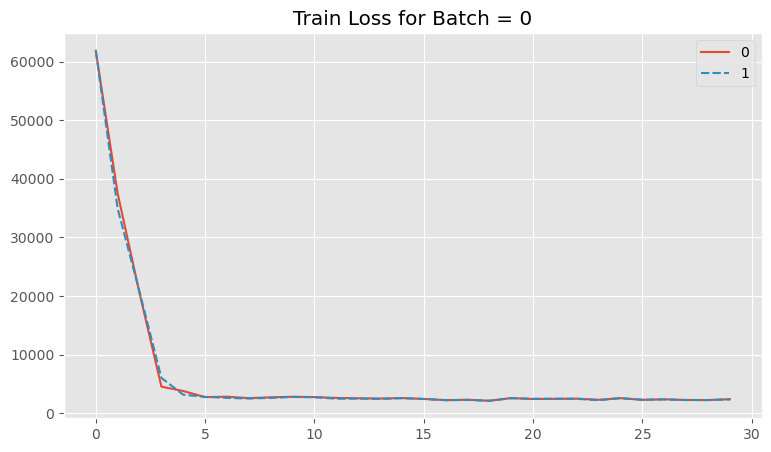

In [311]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=train_loss.drop(["batch"], axis=1).reset_index(drop=True))
plt.title(f"Train Loss for Batch = {batch_idx}")
plt.show()

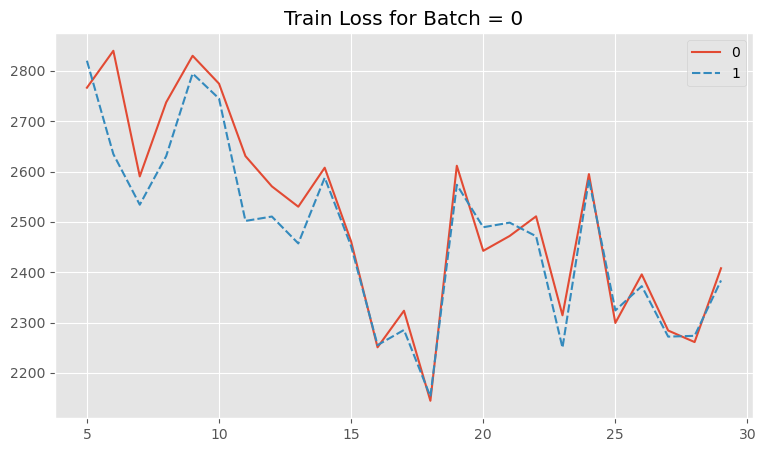

In [312]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=train_loss.drop(["batch"], axis=1).reset_index(drop=True).loc[5:])
plt.title(f"Train Loss for Batch = {batch_idx}")
plt.show()

## Type II Training

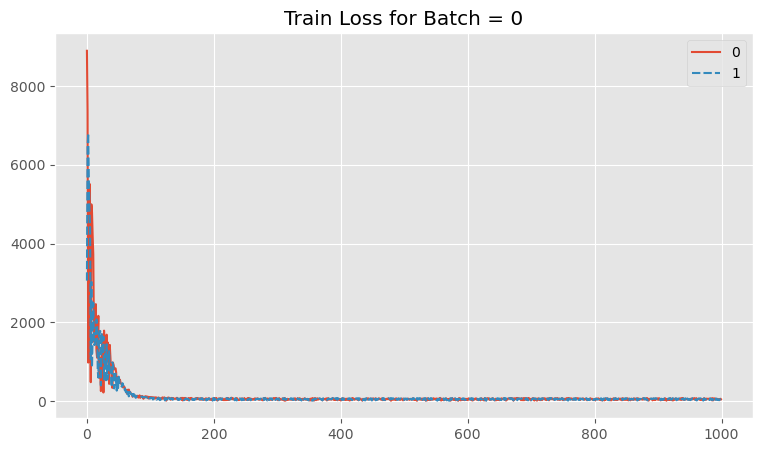

In [327]:
batch_idx = 0

plt.figure(figsize=(9, 5))
sns.lineplot(data=train_loss.loc[train_loss["batch"] == batch_idx].drop(["batch"], axis=1).reset_index(drop=True)[0:1000])
plt.title(f"Train Loss for Batch = {batch_idx}")
plt.show()

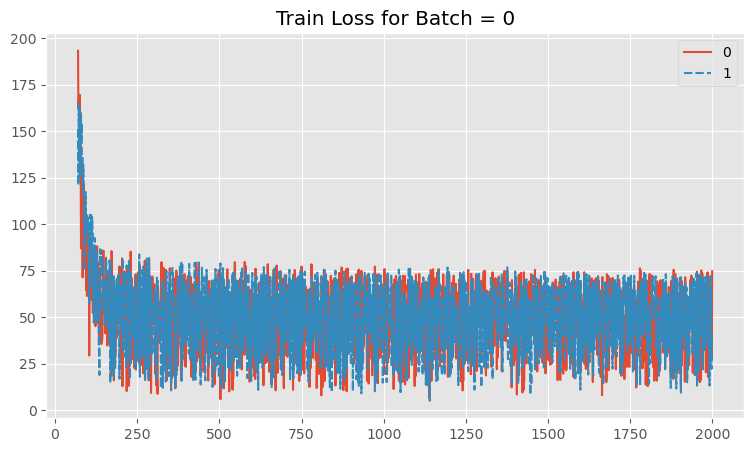

In [306]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=train_loss.loc[train_loss["batch"] == batch_idx].drop(["batch"], axis=1).reset_index(drop=True)[70:2000])
plt.title(f"Train Loss for Batch = {batch_idx}")
plt.show()

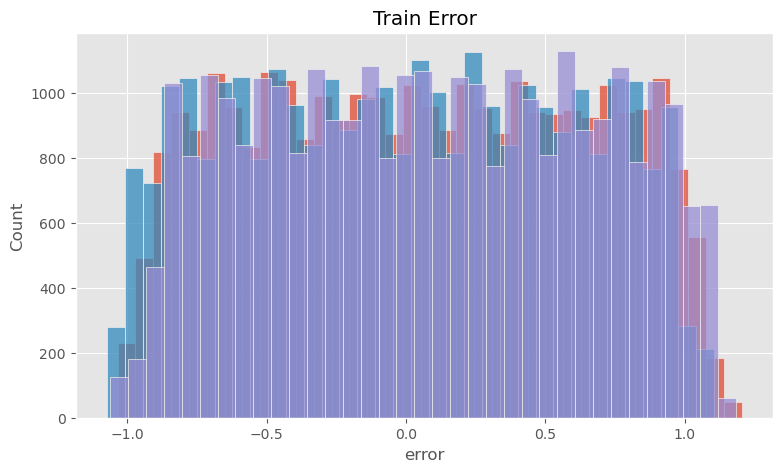

In [225]:
plt.figure(figsize=(9, 5))
sns.histplot(data=train_predictions.loc[train_predictions["batch"] == 0, "error"])
sns.histplot(data=train_predictions.loc[train_predictions["batch"] == 1, "error"])
sns.histplot(data=train_predictions.loc[train_predictions["batch"] == 2, "error"])
plt.title("Train Error")
plt.show()

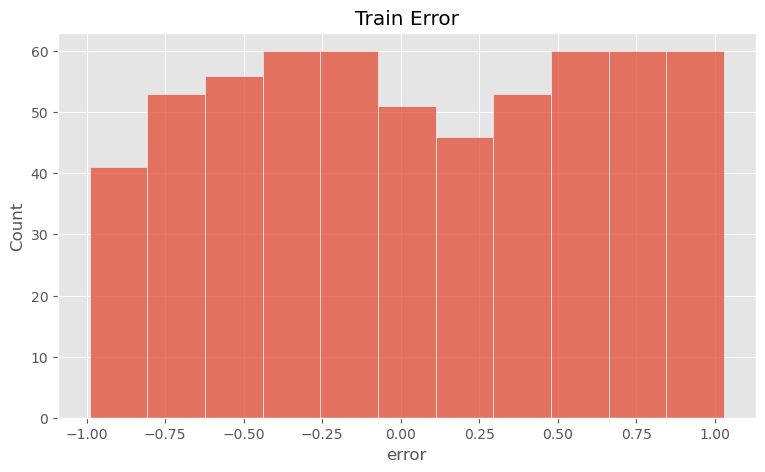

In [226]:
plt.figure(figsize=(9, 5))
sns.histplot(data=test_predictions.loc[:, "error"])
plt.title("Train Error")
plt.show()